In [1]:
import matplotlib.pyplot as plt
import cv2 as cv
import pandas as pd
import os
import time

In [2]:
proto = "./__models/02_SSDResNet/deploy.prototxt.txt"
model = "./__models/02_SSDResNet/res10_300x300_ssd_iter_140000.caffemodel"

detector = cv.dnn.readNetFromCaffe(proto, model)

base_path = "./dataset/dataset_augmented/test/images"
images = os.listdir(base_path)

In [3]:
times = []
bboxes = []

for idx, img in enumerate(images):
    # Read image, resize for model, create blob, set as input
    image = cv.imread(os.path.join(base_path, img))

    original_size = image.shape
    target_size = (300, 300)
    image = cv.resize(image, target_size)
    aspect_ratio_x = (original_size[1] / target_size[1])
    aspect_ratio_y = (original_size[0] / target_size[0])

    blob = cv.dnn.blobFromImage(image)
    detector.setInput(blob)

    # Detect faces, calc. time
    start = time.time()
    output = detector.forward()
    end = time.time()

    times.append(end - start)
    print("[INFO] {:.6f} for image".format(end - start))

    # 0 :: img_id
    # 1 :: is_face
    # 2 :: confidence
    # 3 - 6 :: left, top, right, bottom
    # Extract bboxes from output
    current_bboxes = []
    for value in output[0][0]:
        # Only if "is_face" and confidence > 90%
        if value[1] != 1 or value[2] <= 0.90:
            continue
        # Scale decimal value to image size 640
        current_bbox = [int(value[3] * 300 * aspect_ratio_x), int(value[4] * 300 * aspect_ratio_y),
                        int(value[5] * 300 * aspect_ratio_x), int(value[6] * 300 * aspect_ratio_y)]
        current_bboxes.append(current_bbox)

    bboxes.append(current_bboxes)


[INFO] 0.014999 for image
[INFO] 0.009000 for image
[INFO] 0.008499 for image
[INFO] 0.009500 for image
[INFO] 0.008999 for image
[INFO] 0.009500 for image
[INFO] 0.008500 for image
[INFO] 0.009498 for image
[INFO] 0.010001 for image
[INFO] 0.009000 for image
[INFO] 0.009000 for image
[INFO] 0.009001 for image
[INFO] 0.009001 for image
[INFO] 0.009000 for image
[INFO] 0.009500 for image
[INFO] 0.009498 for image
[INFO] 0.009500 for image
[INFO] 0.009500 for image
[INFO] 0.009000 for image
[INFO] 0.009501 for image
[INFO] 0.008499 for image
[INFO] 0.009000 for image
[INFO] 0.010000 for image
[INFO] 0.009002 for image
[INFO] 0.009000 for image
[INFO] 0.008999 for image
[INFO] 0.008500 for image
[INFO] 0.009501 for image
[INFO] 0.009001 for image
[INFO] 0.008999 for image
[INFO] 0.009500 for image
[INFO] 0.009000 for image
[INFO] 0.009000 for image
[INFO] 0.009500 for image
[INFO] 0.008998 for image
[INFO] 0.008500 for image
[INFO] 0.008500 for image
[INFO] 0.009000 for image
[INFO] 0.008

In [4]:
import pandas as pd
import numpy as np

p_images = []
p_times = []
p_x1 = []
p_y1 = []
p_x2 = []
p_y2 = []

for p_image, p_time, p_bbox in zip(images, times, bboxes):

    # No Bbox
    if len(p_bbox) == 0:
        p_images.append(p_image)
        p_times.append(p_time)

        p_x1.append(np.NAN)
        p_y1.append(np.NAN)
        p_x2.append(np.NAN)
        p_y2.append(np.NAN)

    # Bbox
    for box in p_bbox:
        # TODO :: Adjust format (x1, y1, ?, ?)
        p_images.append(p_image)
        p_times.append(p_time)

        p_x1.append(box[0])
        p_y1.append(box[1])
        p_x2.append(box[2])
        p_y2.append(box[3])

df = pd.DataFrame(list(zip(p_images, p_times, p_x1, p_y1, p_x2, p_y2)), columns=[
                  "Image", "Time", "X1", "Y1", "X2", "Y2"])
df

,Image,Time,X1,Y1,X2,Y2
0,1001_jpg.rf.b7c44a27e79dbc4de661327ba01c1edd.jpg,0.014999,235.0,137.0,453.0,532.0
1,1005_jpg.rf.bb3f3203348f9e88224f7467ef52843c.jpg,0.009000,245.0,177.0,482.0,427.0
2,1005_jpg.rf.bb3f3203348f9e88224f7467ef52843c.jpg,0.009000,142.0,112.0,190.0,182.0
3,1014_jpg.rf.c539a1eadeef2d13f1bf7d0f7b5c254c.jpg,0.008499,174.0,124.0,336.0,394.0
4,1061_jpg.rf.44dd02d8bd98efc8deac4f6fbc60ef99.jpg,0.009500,334.0,137.0,408.0,281.0
...,...,...,...,...,...,...
1074,985_jpg.rf.9277df9a3b6c30be5d85b888f18bb41f.jpg,0.008499,275.0,310.0,355.0,457.0
1075,986_jpg.rf.6f8ff4f13b76e435399fe4d604c285b3.jpg,0.008999,270.0,131.0,485.0,530.0
1076,987_jpg.rf.dff0e90c55a7621864aee639fd482d98.jpg,0.009000,231.0,141.0,296.0,257.0
1077,98_jpg.rf.c929bd3c5be065cfdc29dfe04ff72d87.jpg,0.009001,272.0,194.0,366.0,369.0


1148_jpg.rf.02b4f42bf07950906637f830582e835b.jpg
184 111 473 384


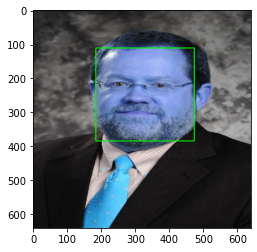

In [5]:
image_names = np.unique(df.Image)
current_entry = image_names[8]
print(current_entry)

current_df = df[df['Image'] == current_entry]

# Read image from your local file system
testImage = cv.imread(os.path.join(base_path, current_entry))

for df_idx, row in current_df.iterrows():
    if np.isnan(row['X1']):
        continue

    x1 = int(row['X1'])
    y1 = int(row['Y1'])
    x2 = int(row['X2'])
    y2 = int(row['Y2'])

    print(x1, y1, x2, y2)

    cv.rectangle(
        testImage,
        (x1, y1),
        (x2, y2),
        (0, 255, 0),
        2
    )

plt.figure(figsize=(4, 4))
plt.imshow(testImage)
plt.show()


In [6]:
model_name = "SSDResNet"

folder_path = f"./test_results/{model_name}"
os.mkdir(folder_path)

results_path = f"./test_results/{model_name}.xlsx"


df.to_excel(results_path, index=False)